# 4.19.x Final Assignment

In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from prophet import Prophet

sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

### Part 1

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [23]:
food=pd.read_excel(r"D:\Users\guidi\anaconda3\esercizi\Week 21 _ End of Module Assignment\Week 21 _ End of Module Assignment\data\food_consumption.xlsx")

In [24]:
food.head()

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


In [25]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [26]:
food.country.unique()

array(['Argentina', 'Australia', 'Albania', 'Iceland', 'New Zealand',
       'USA', 'Uruguay', 'Luxembourg', 'Brazil', 'Kazakhstan', 'Sweden',
       'Bermuda', 'Denmark', 'Finland', 'Ireland', 'Greece', 'France',
       'Canada', 'Norway', 'Hong Kong SAR. China', 'French Polynesia',
       'Israel', 'Switzerland', 'Netherlands', 'Kuwait', 'United Kingdom',
       'Austria', 'Oman', 'Italy', 'Bahamas', 'Portugal', 'Malta',
       'Armenia', 'Slovenia', 'Chile', 'Venezuela', 'Belgium', 'Germany',
       'Russia', 'Croatia', 'Belarus', 'Spain', 'Paraguay',
       'New Caledonia', 'South Africa', 'Barbados', 'Lithuania', 'Turkey',
       'Estonia', 'Mexico', 'Costa Rica', 'Bolivia', 'Ecuador', 'Panama',
       'Czech Republic', 'Romania', 'Colombia', 'Maldives', 'Cyprus',
       'Serbia', 'United Arab Emirates', 'Algeria', 'Ukraine', 'Pakistan',
       'Swaziland', 'Latvia', 'Bosnia and Herzegovina', 'Fiji',
       'South Korea', 'Poland', 'Saudi Arabia', 'Botswana', 'Macedonia',
       '

In [27]:
food.consumption.unique()

array([ 10.51,  38.66,  55.48, ..., 171.73,   0.61,   0.72])

In [28]:
food.food_category.unique()

array(['pork', 'poultry', 'beef', 'lamb_goat', 'fish', 'eggs', 'dairy',
       'wheat', 'rice', 'soybeans', 'nuts'], dtype=object)

In [29]:
food.co2_emission.unique()

array([3.7200e+01, 4.1530e+01, 1.7120e+03, ..., 2.1976e+02, 2.7000e-01,
       1.2700e+00])

1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?** 

In [30]:
food.describe()

,consumption,co2_emission
count,1430.000000,1430.000000
mean,28.110406,74.383993
std,49.818044,152.098566
min,0.000000,0.000000
25%,2.365000,5.210000
50%,8.890000,16.530000
75%,28.132500,62.597500
max,430.760000,1712.000000


In [31]:
food.groupby('food_category')['consumption'].median()

food_category
beef           8.285
dairy        110.975
eggs           8.420
fish          13.950
lamb_goat      1.325
nuts           3.495
pork          10.355
poultry       19.855
rice          11.875
soybeans       0.075
wheat         69.420
Name: consumption, dtype: float64

In [32]:
median_consump=food.groupby('food_category')['consumption'].median()
high_median=median_consump.idxmax()

In [33]:
print(f'The Food category with the highest median consumpion is {high_median}')

The Food category with the highest median consumpion is dairy


2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

<AxesSubplot:xlabel='food_category', ylabel='co2_emission'>

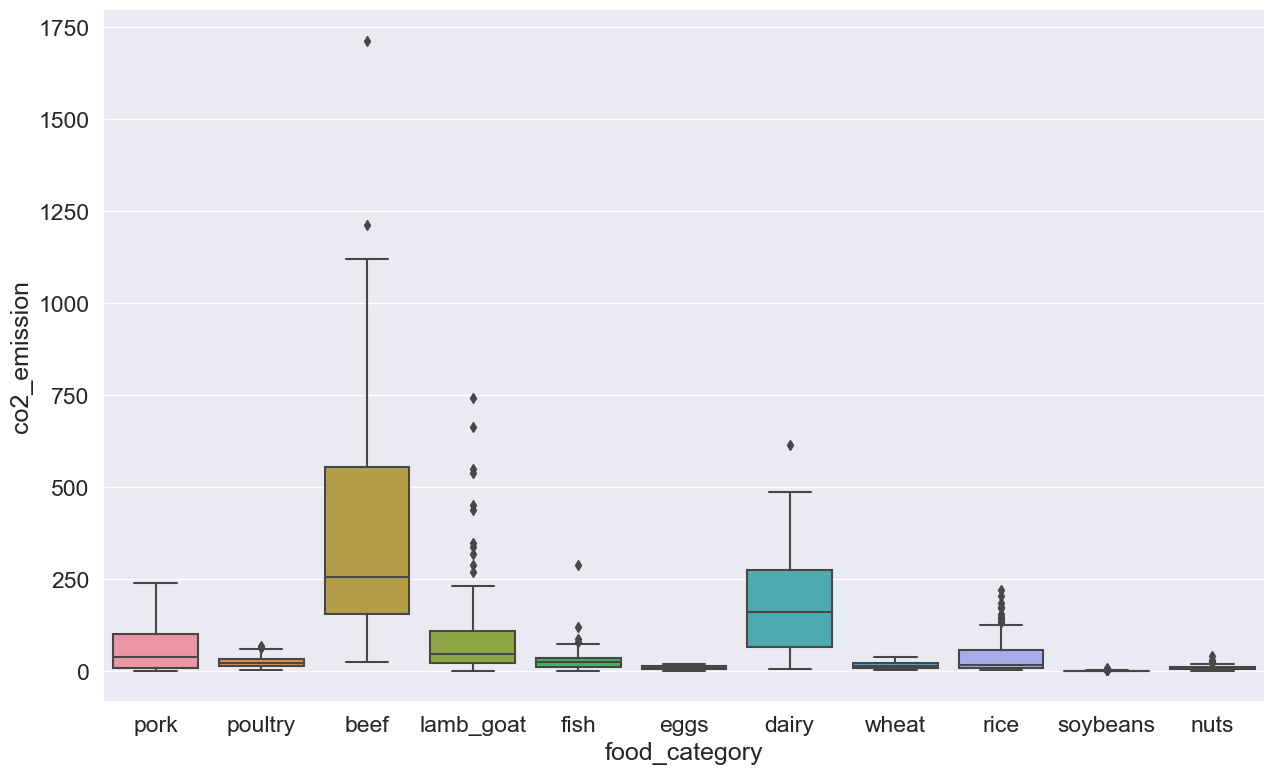

In [34]:
fig, ax = plt.subplots()
sns.boxplot(x='food_category', y='co2_emission', data=food, ax=ax)

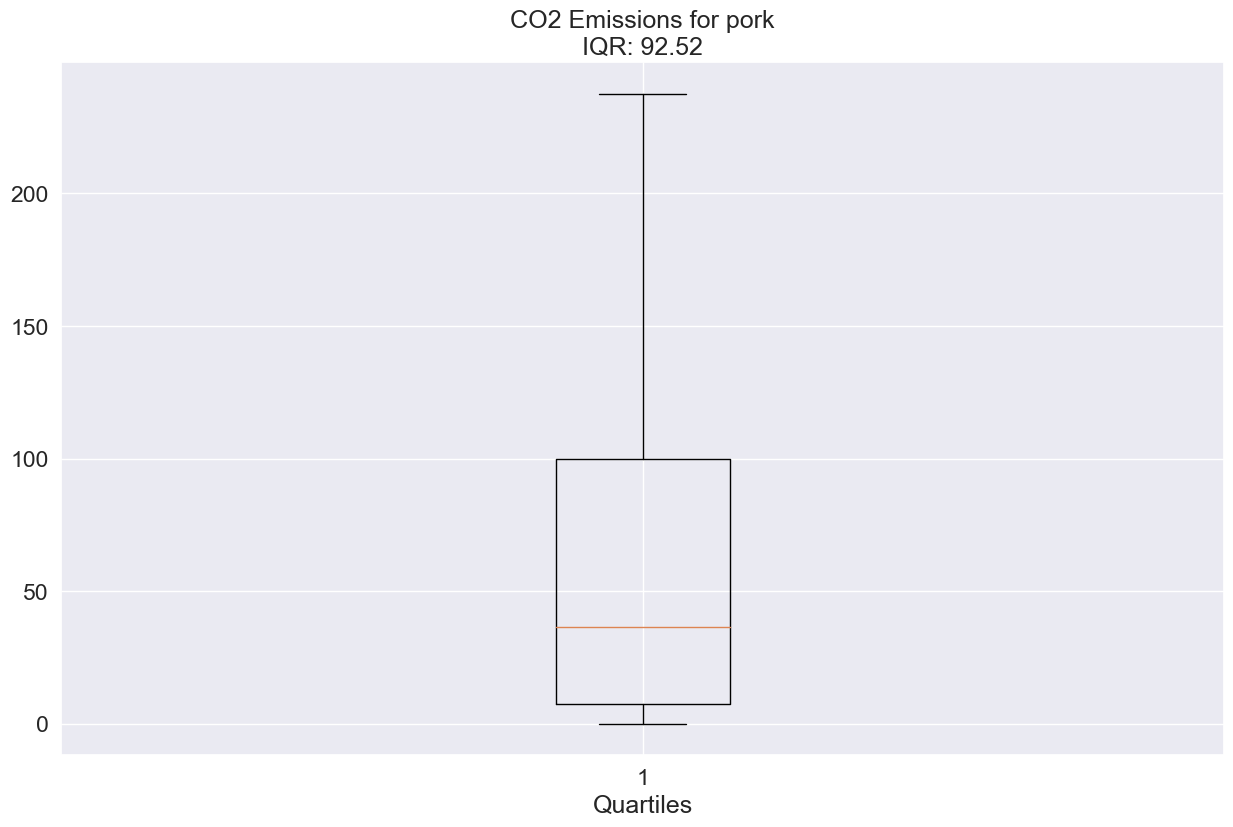

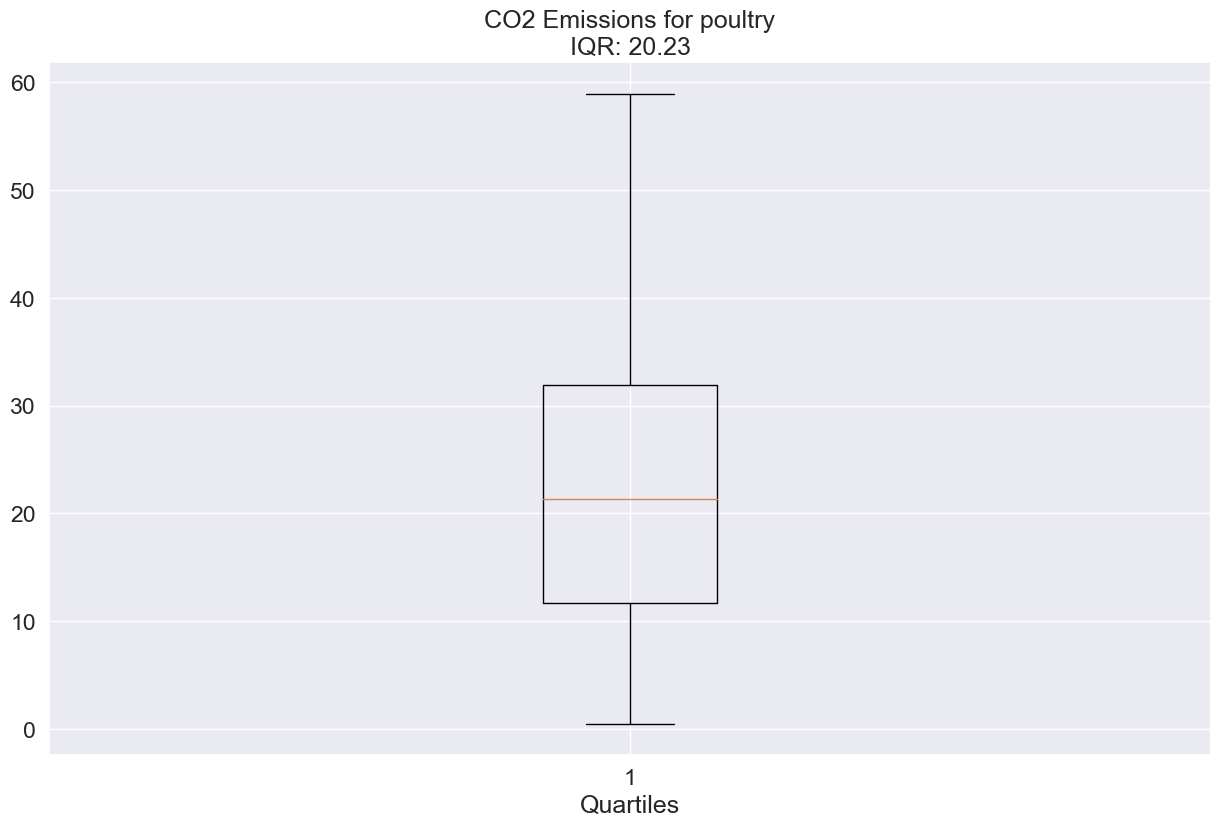

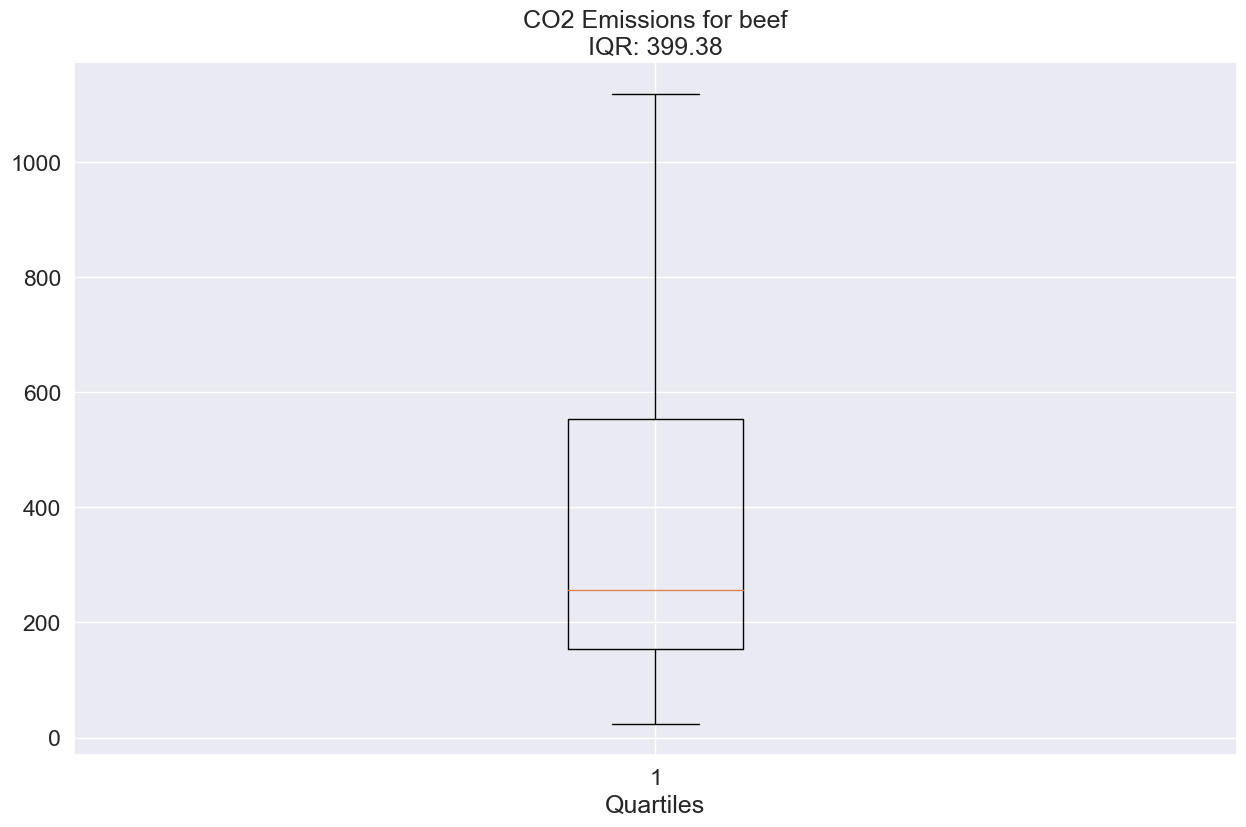

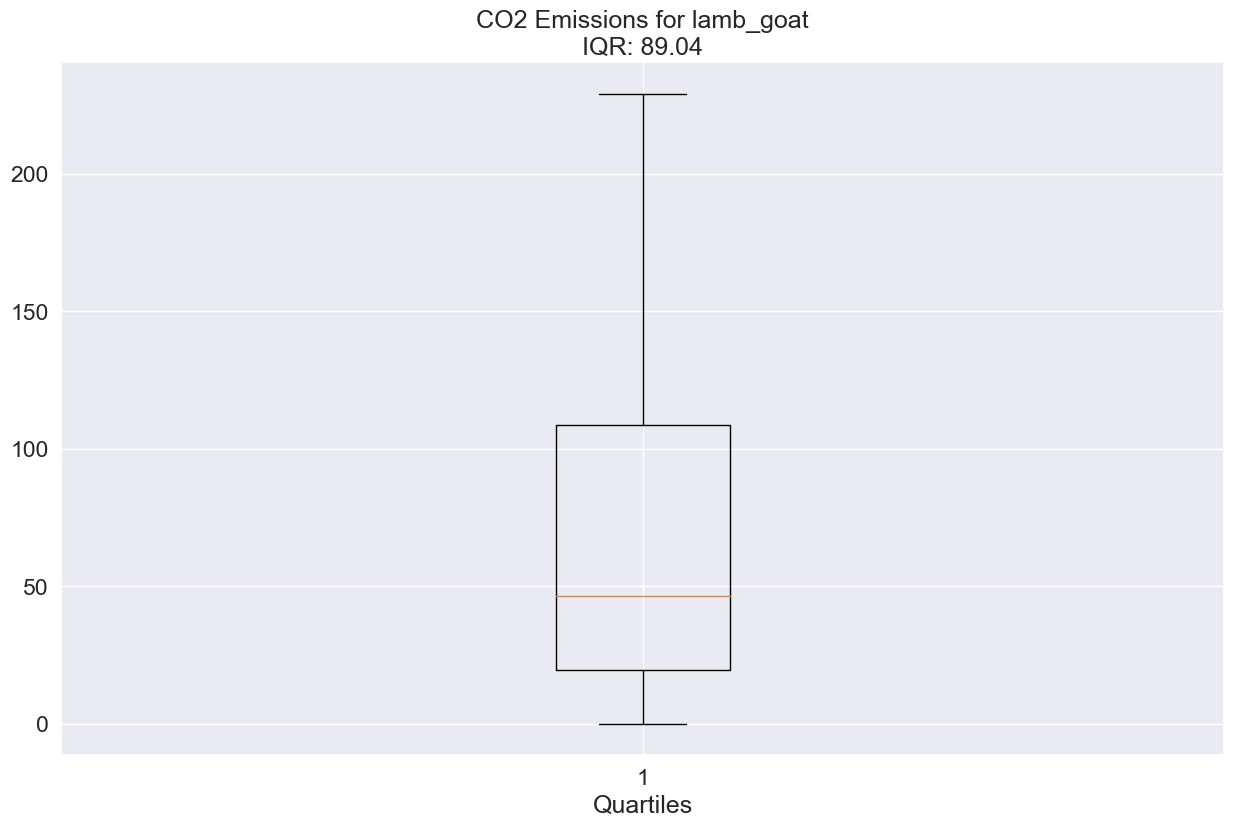

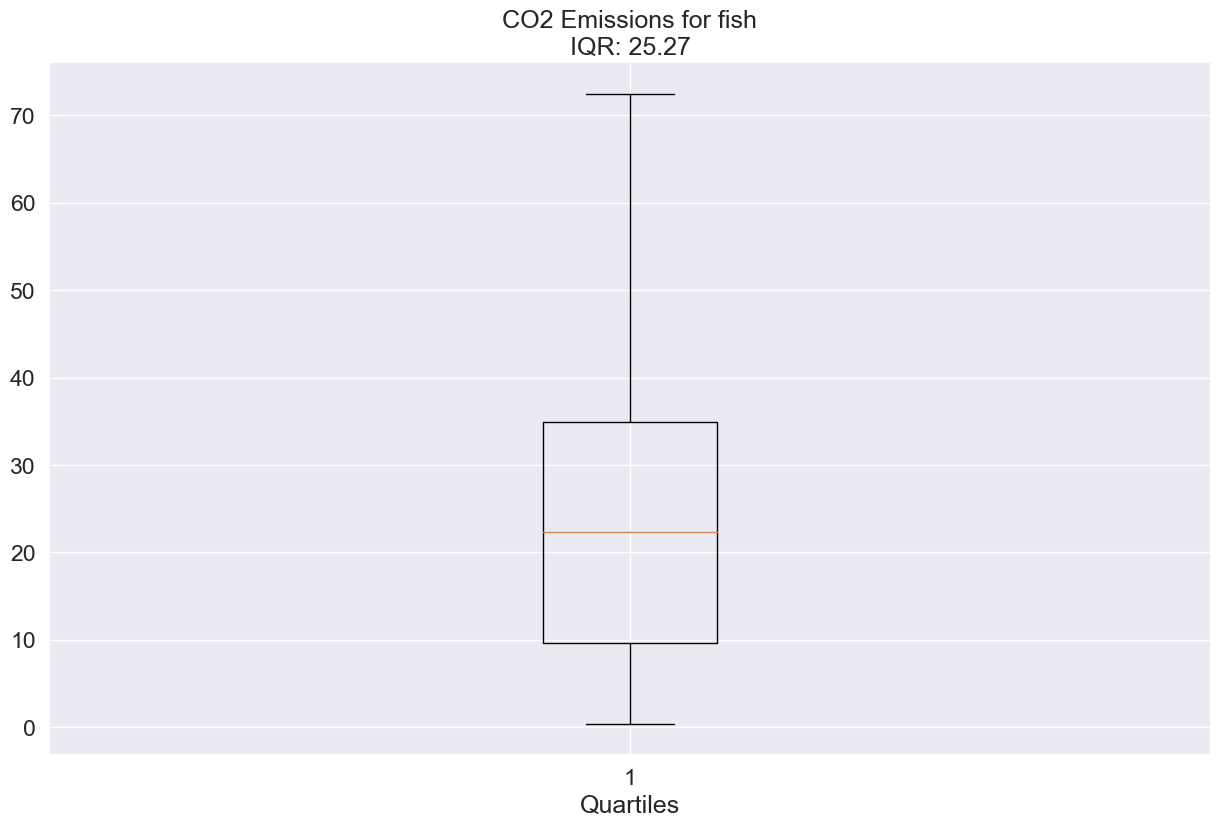

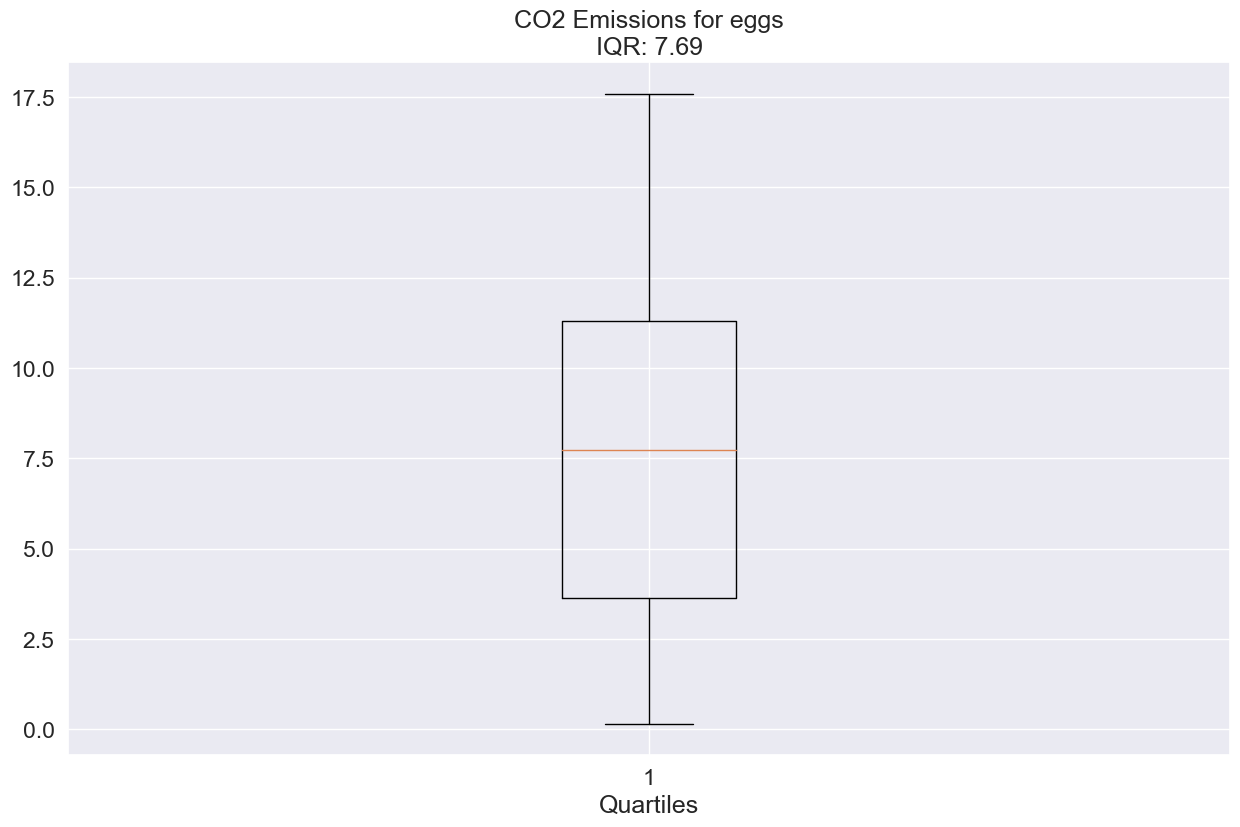

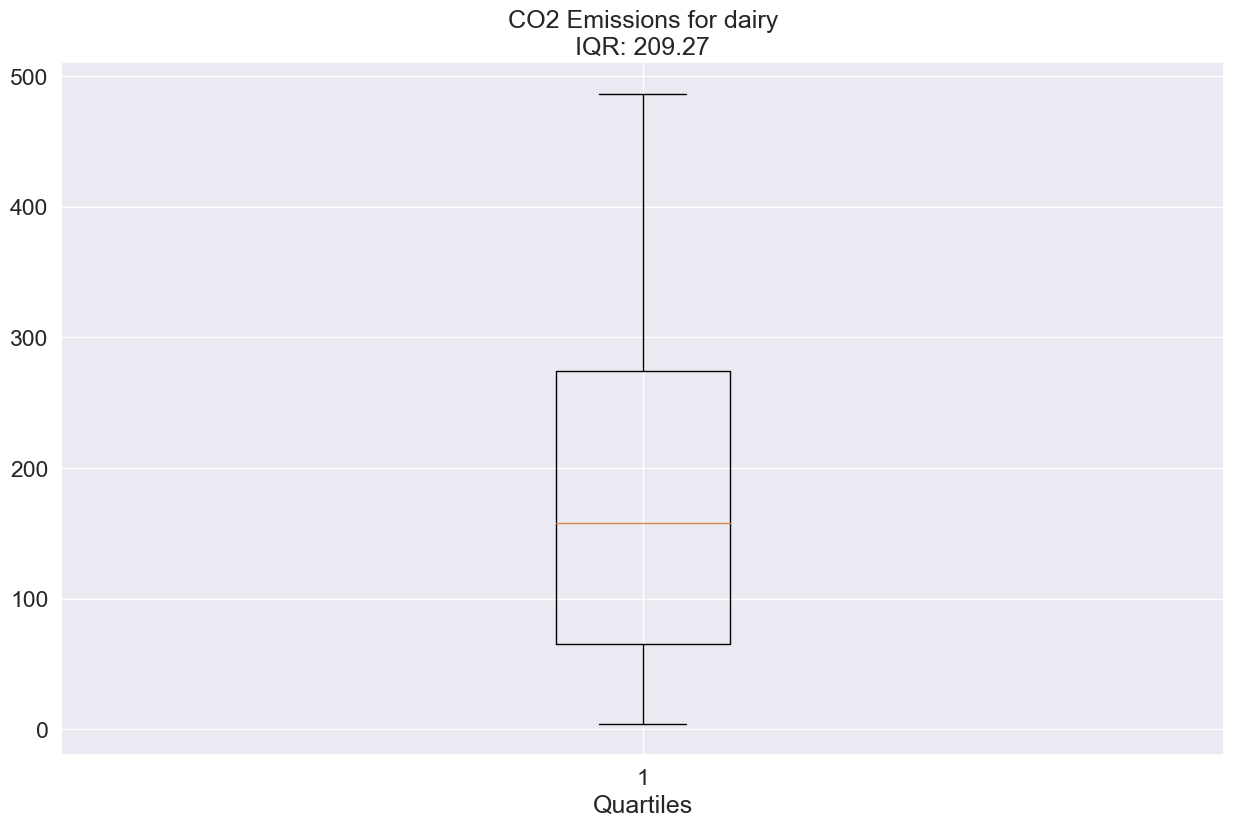

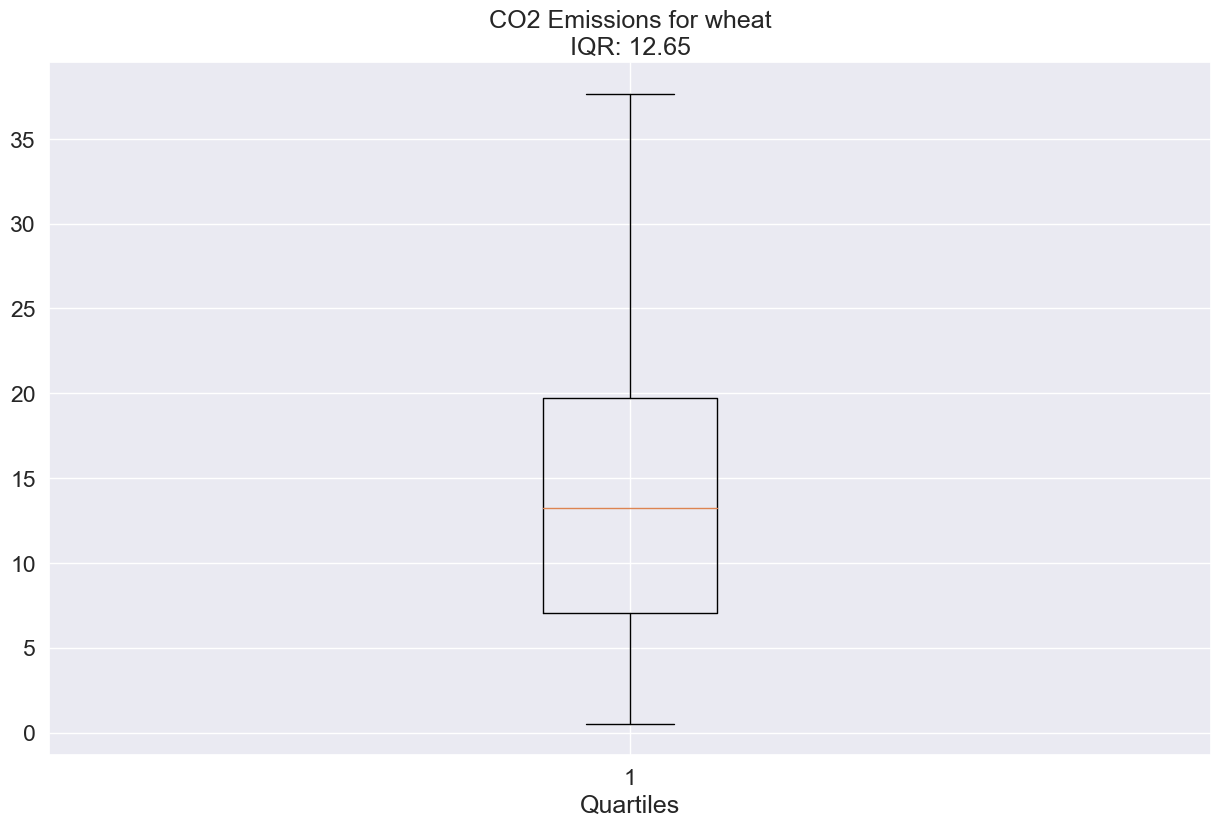

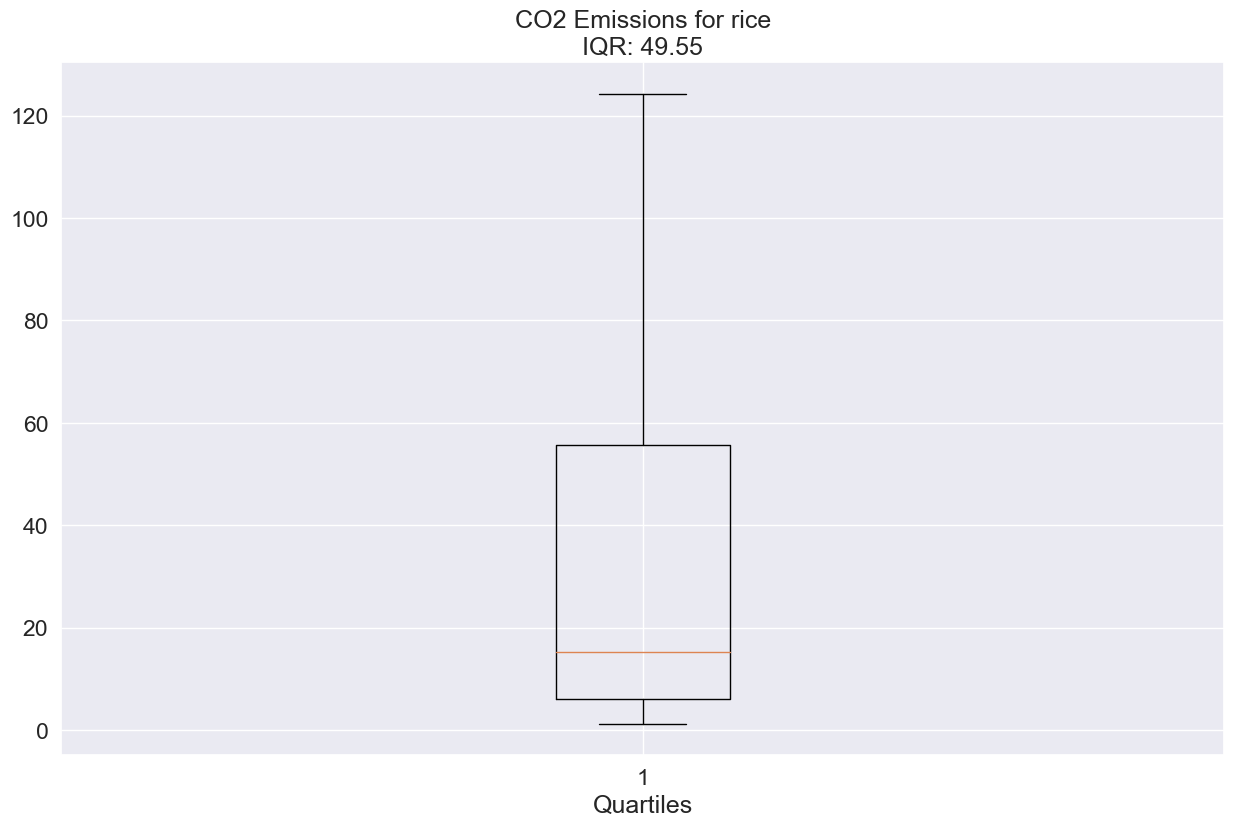

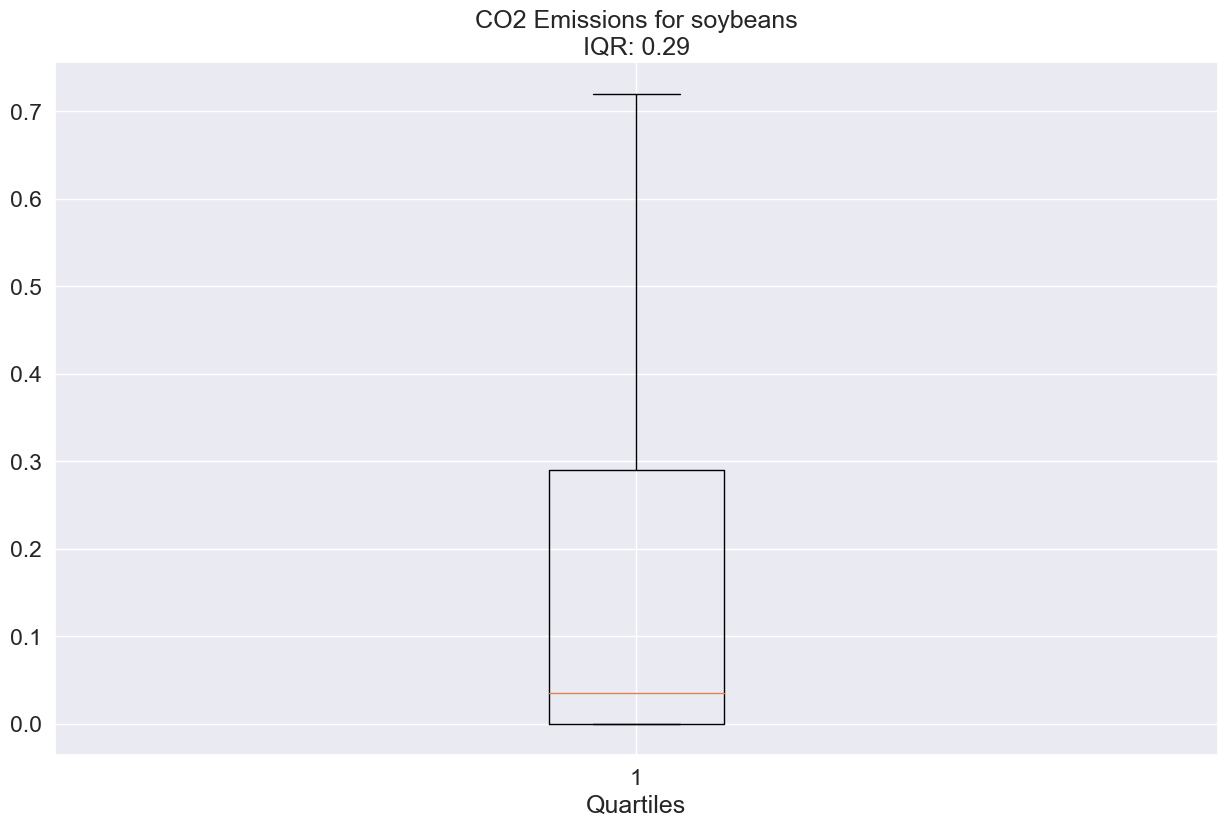

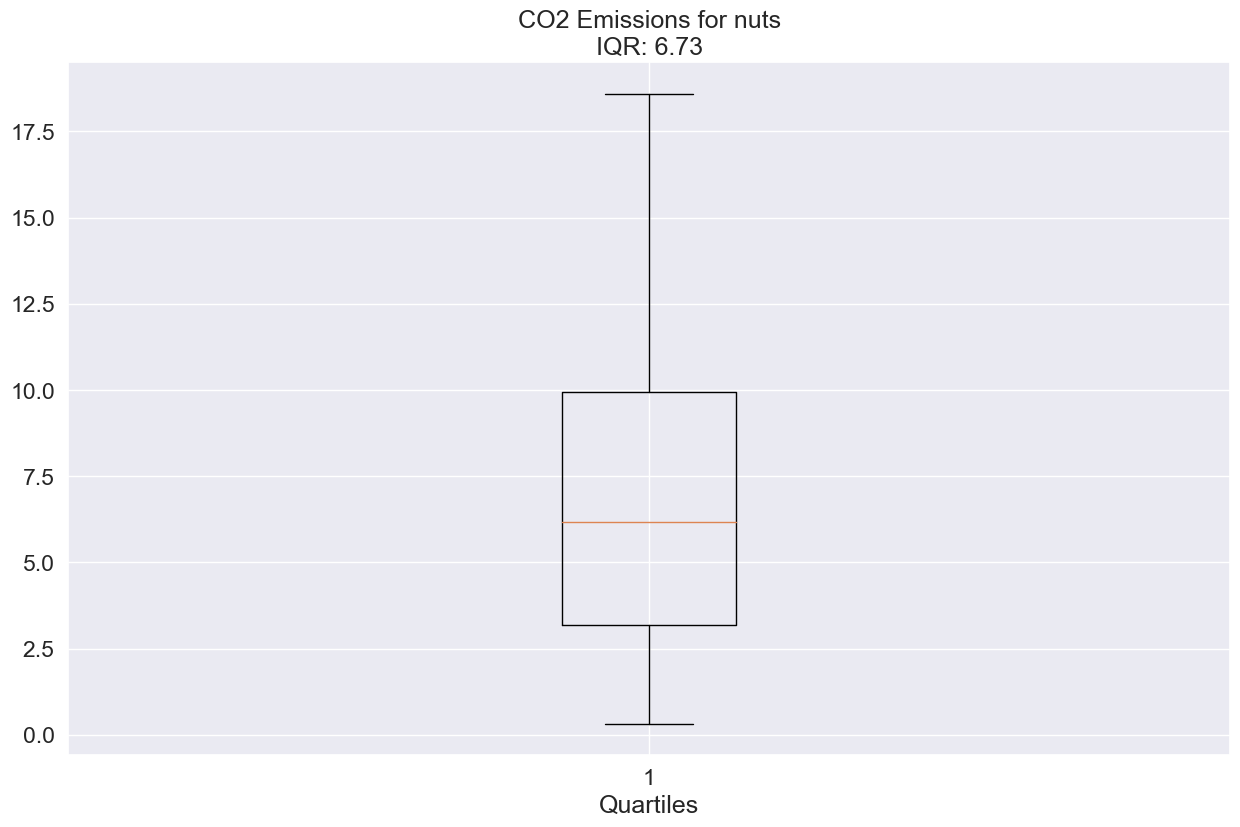

In [35]:
for category in food['food_category'].unique():
    # Get CO2 emission data for current category
    data = food.loc[food['food_category'] == category, 'co2_emission']
    # Calculate quartiles
    q1, q2, q3 = data.quantile([0.25, 0.5, 0.75])
    # Calculate IQR
    iqr = q3 - q1
    # Create box plot with quartiles and IQR label
    plt.boxplot(data, showfliers=False)
    plt.title(f'CO2 Emissions for {category}\nIQR: {iqr:.2f}')
    plt.xlabel('Quartiles')
    plt.show()




**The food category with highest IQR is Beef**

3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value? 

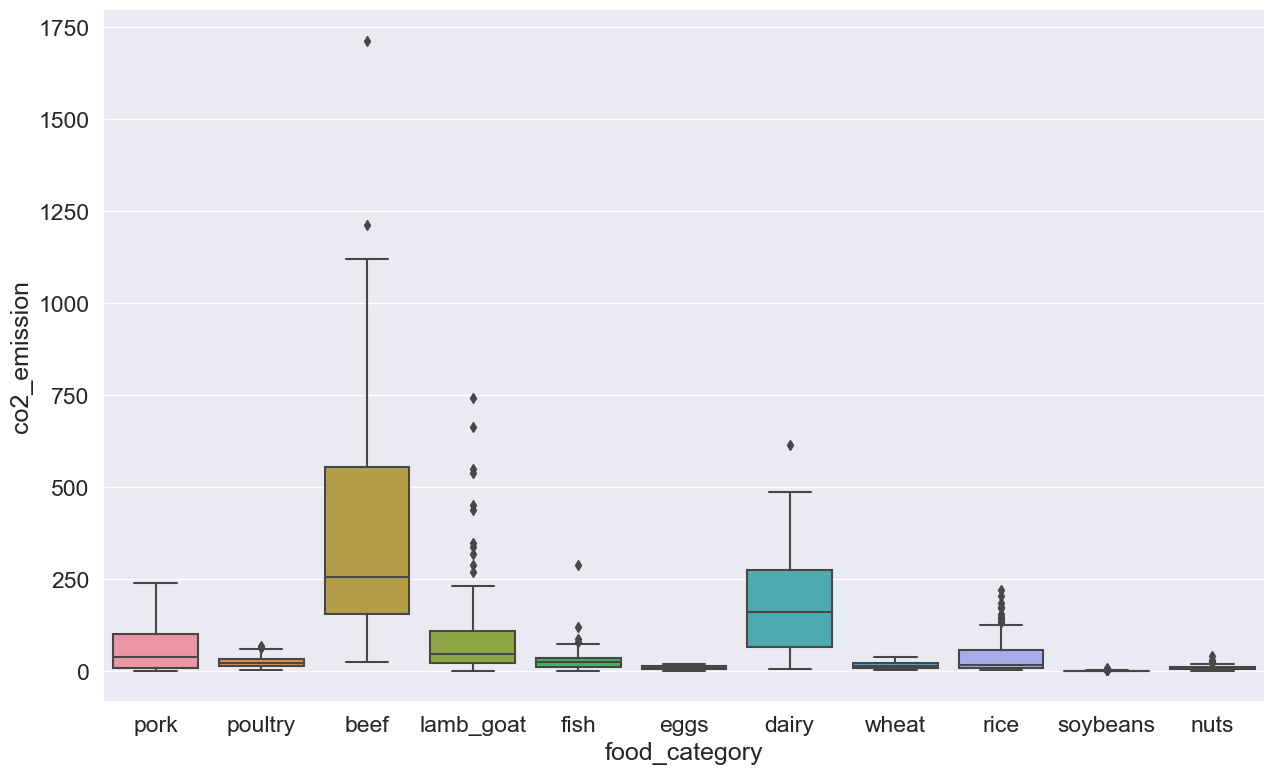

The category with the highest median CO2 emission is beef.


In [36]:
# Create boxplot
fig, ax = plt.subplots()
sns.boxplot(x='food_category', y='co2_emission', data=food, ax=ax)
# Calculate median for each category
medians = food.groupby('food_category')['co2_emission'].median()
# Sort by median and extract category with highest median
category_with_highest_median = medians.sort_values().index[-1]
plt.show()
print(f"The category with the highest median CO2 emission is {category_with_highest_median}.")


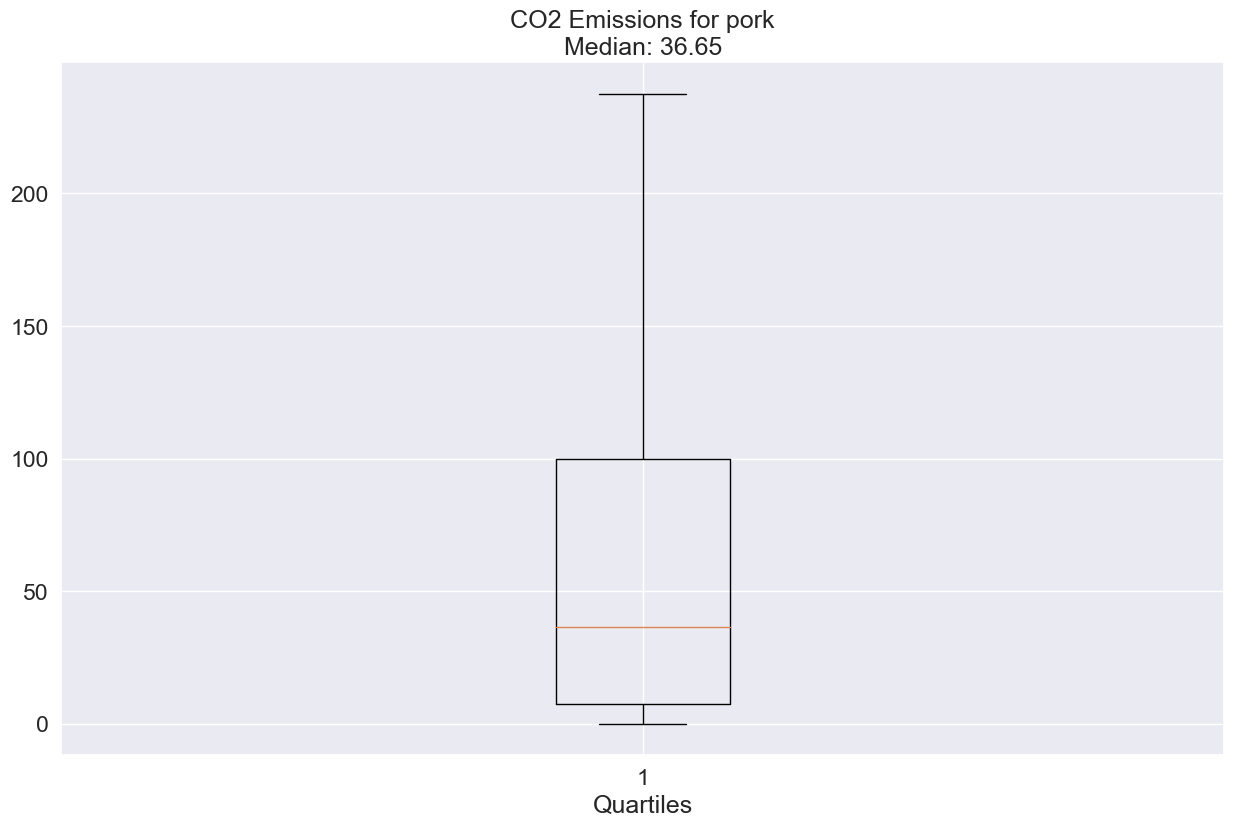

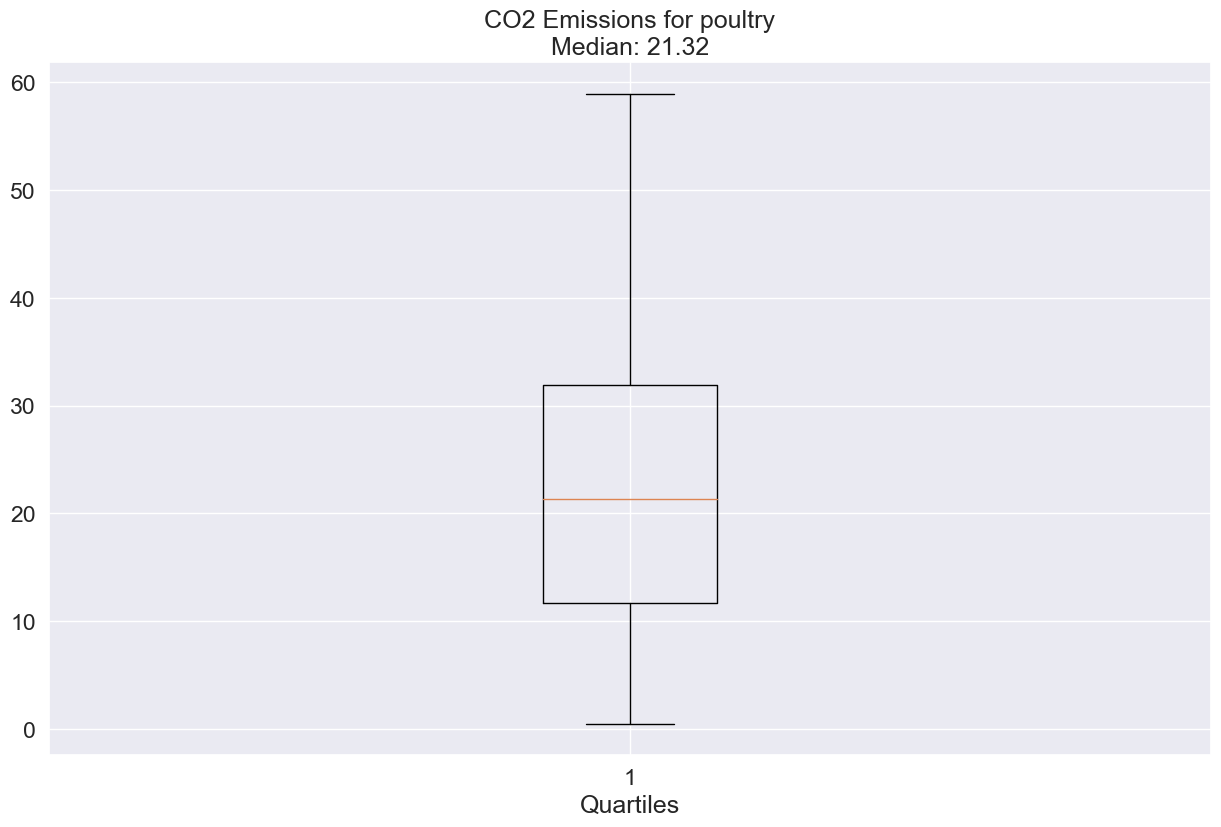

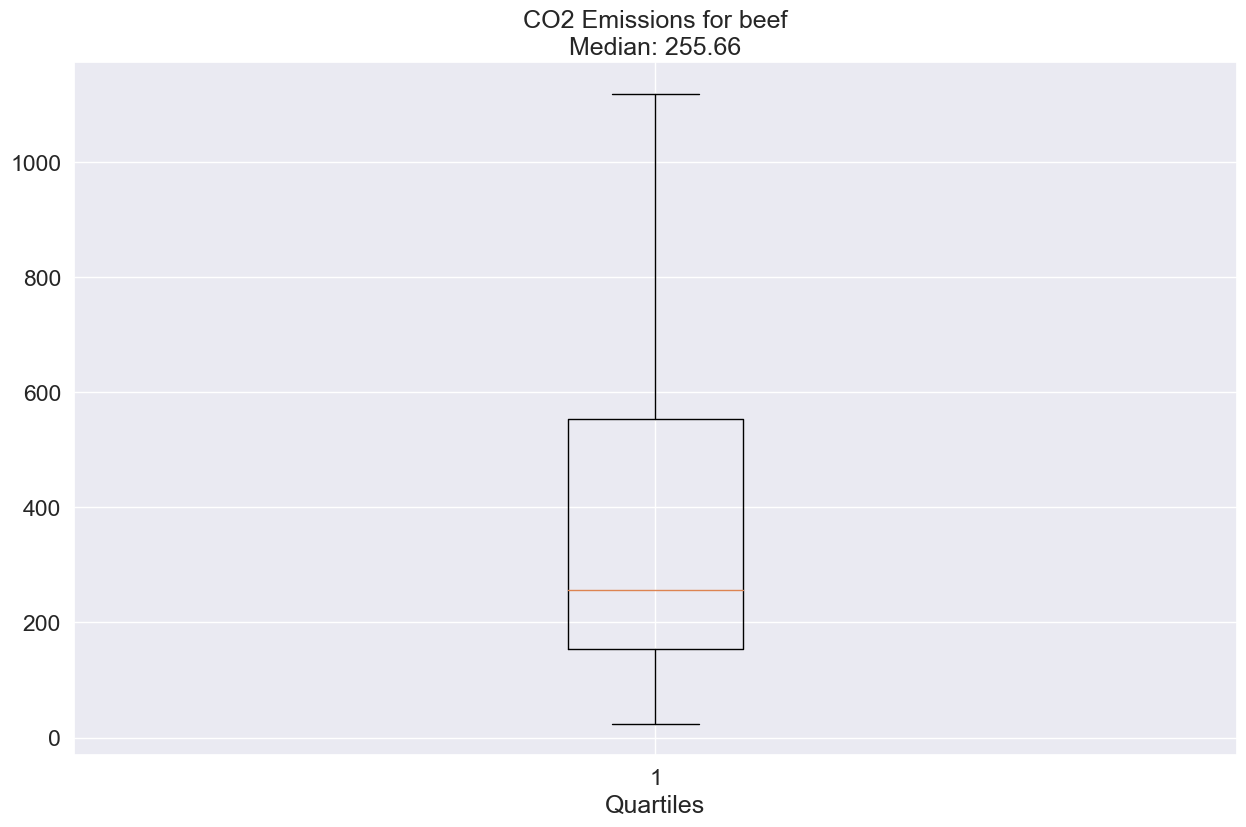

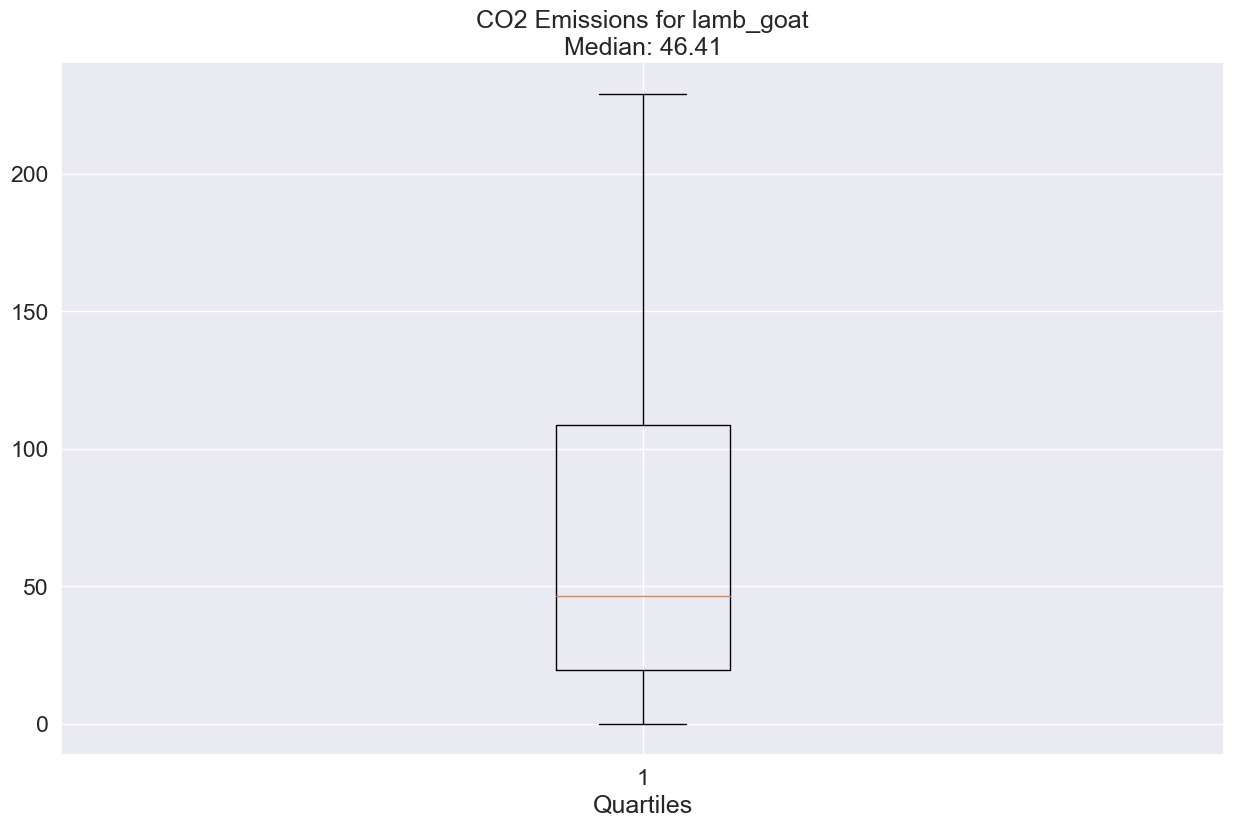

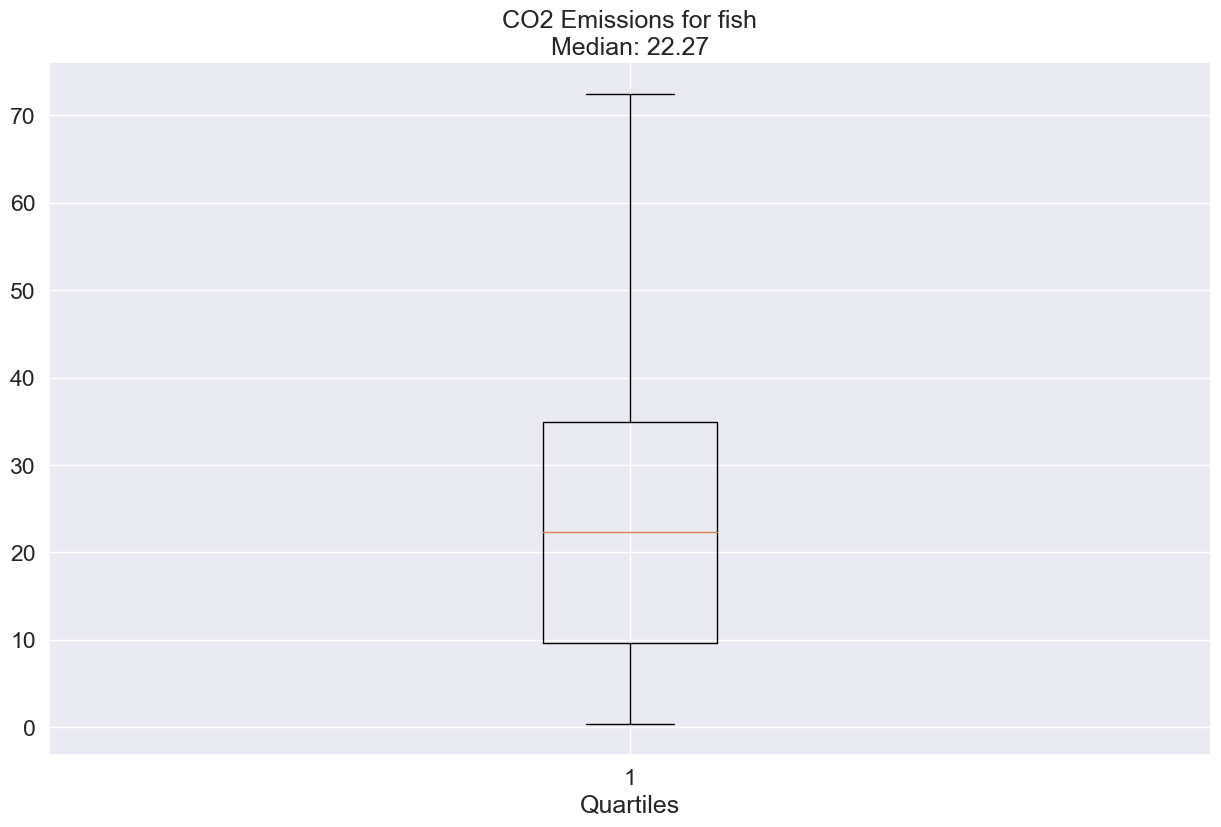

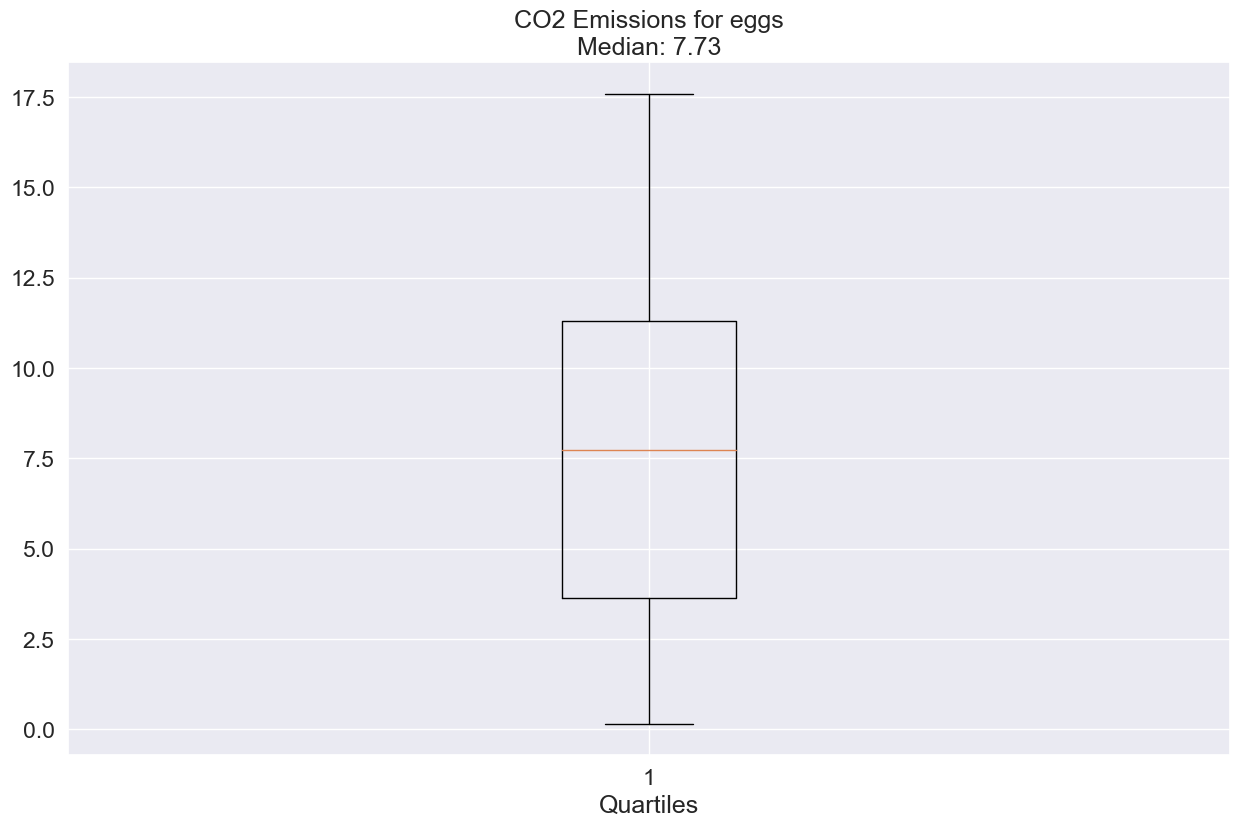

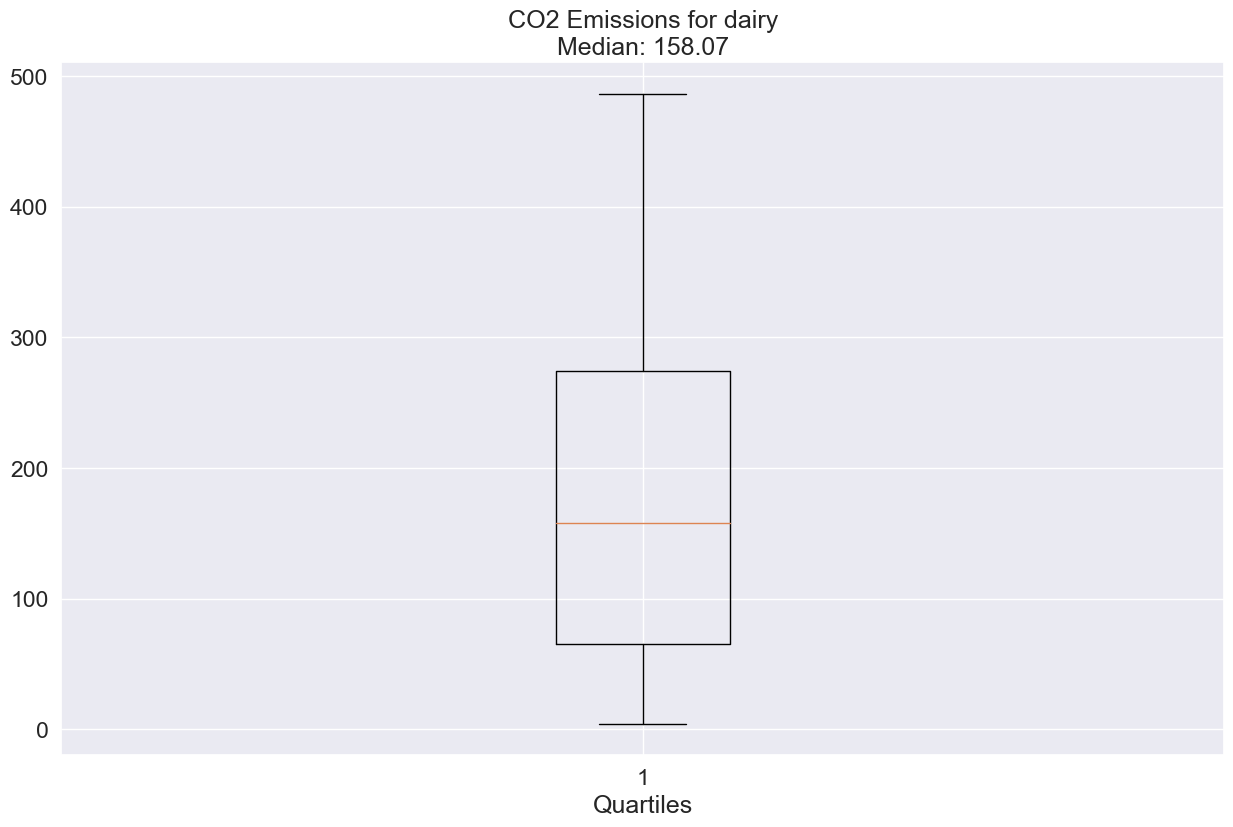

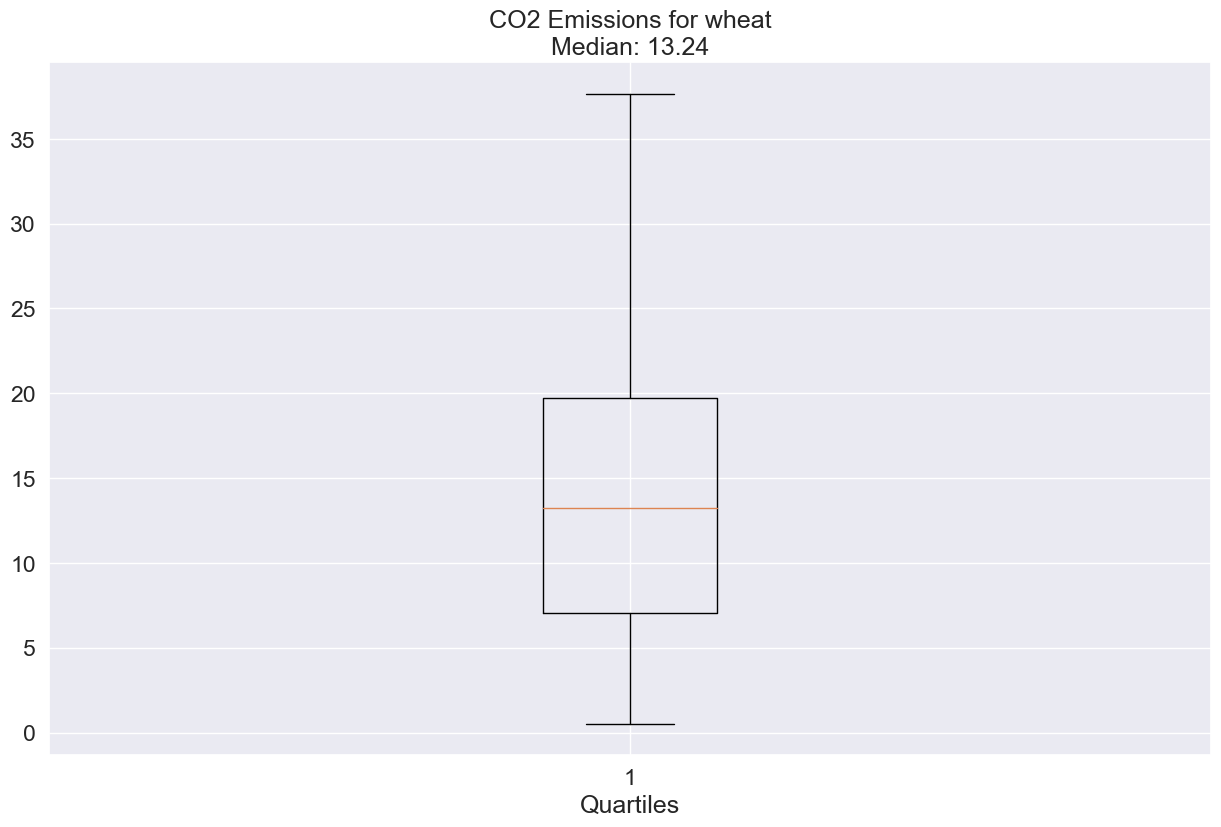

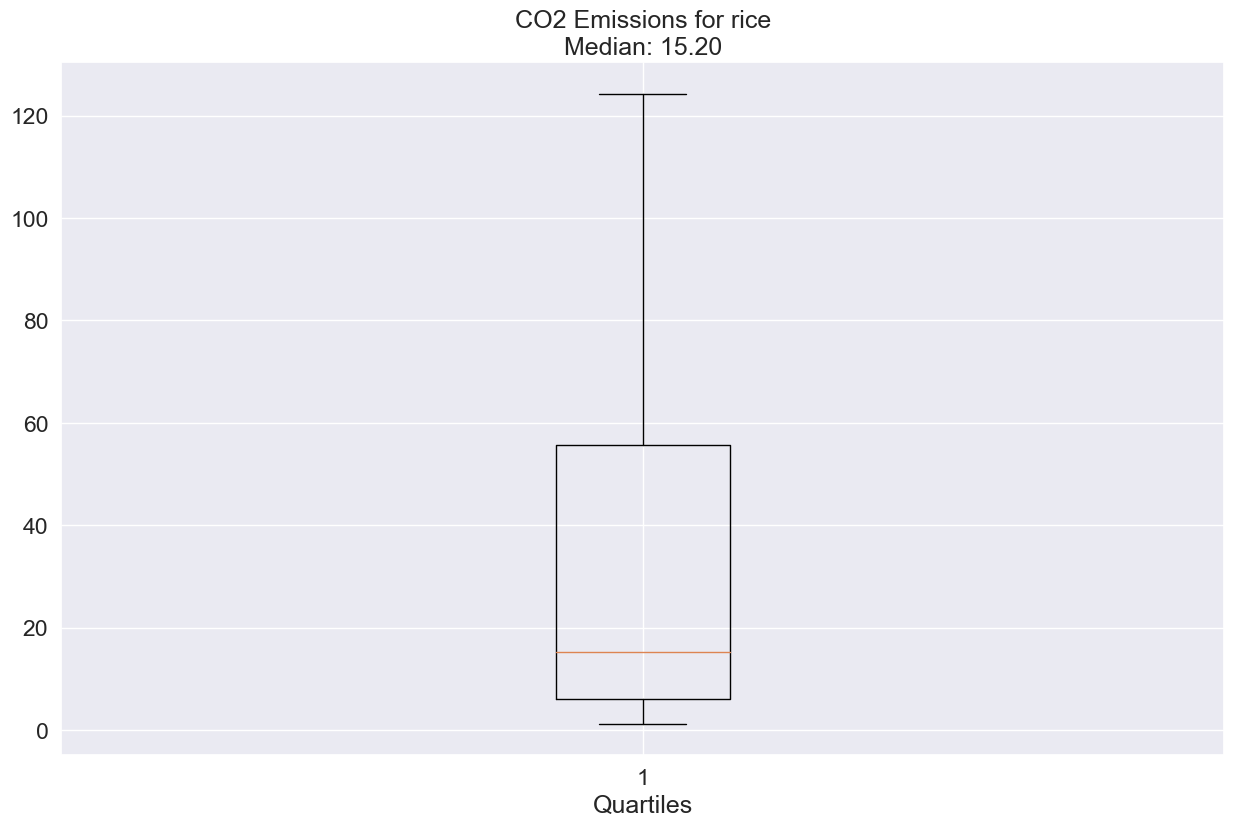

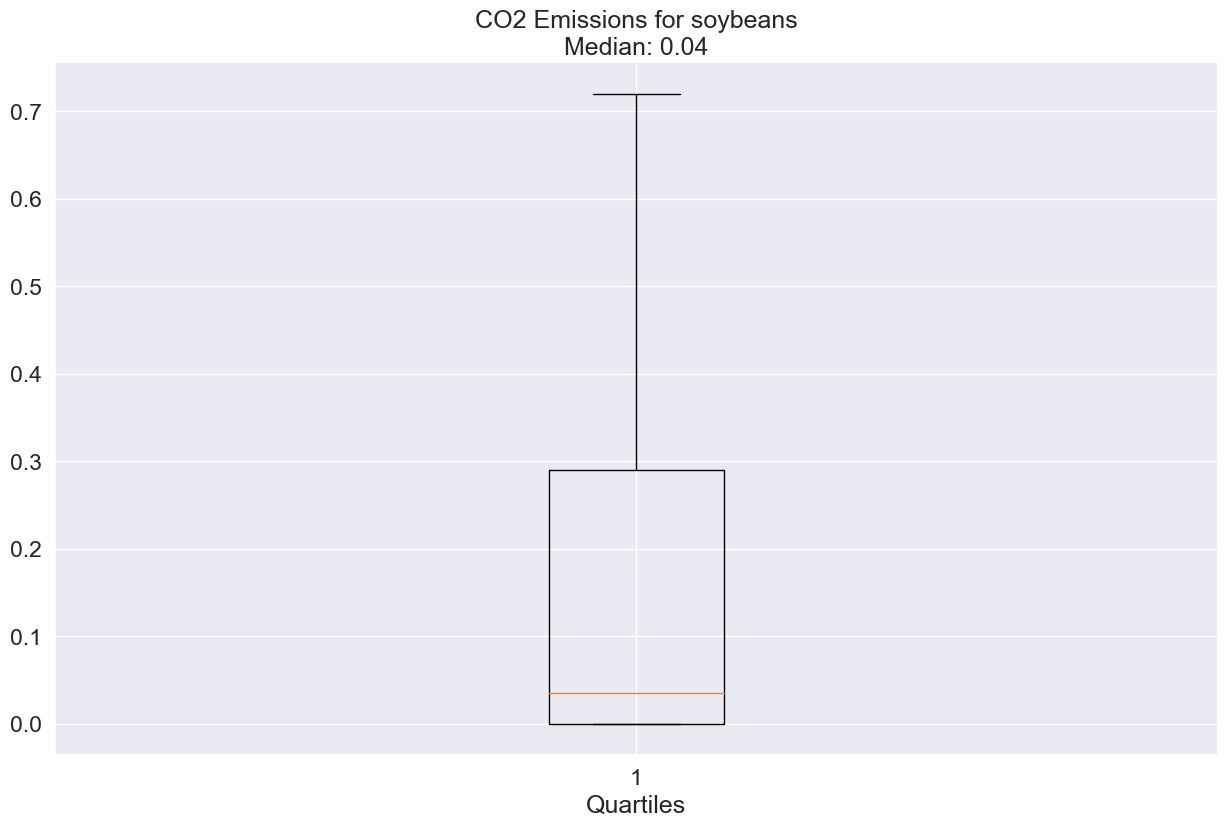

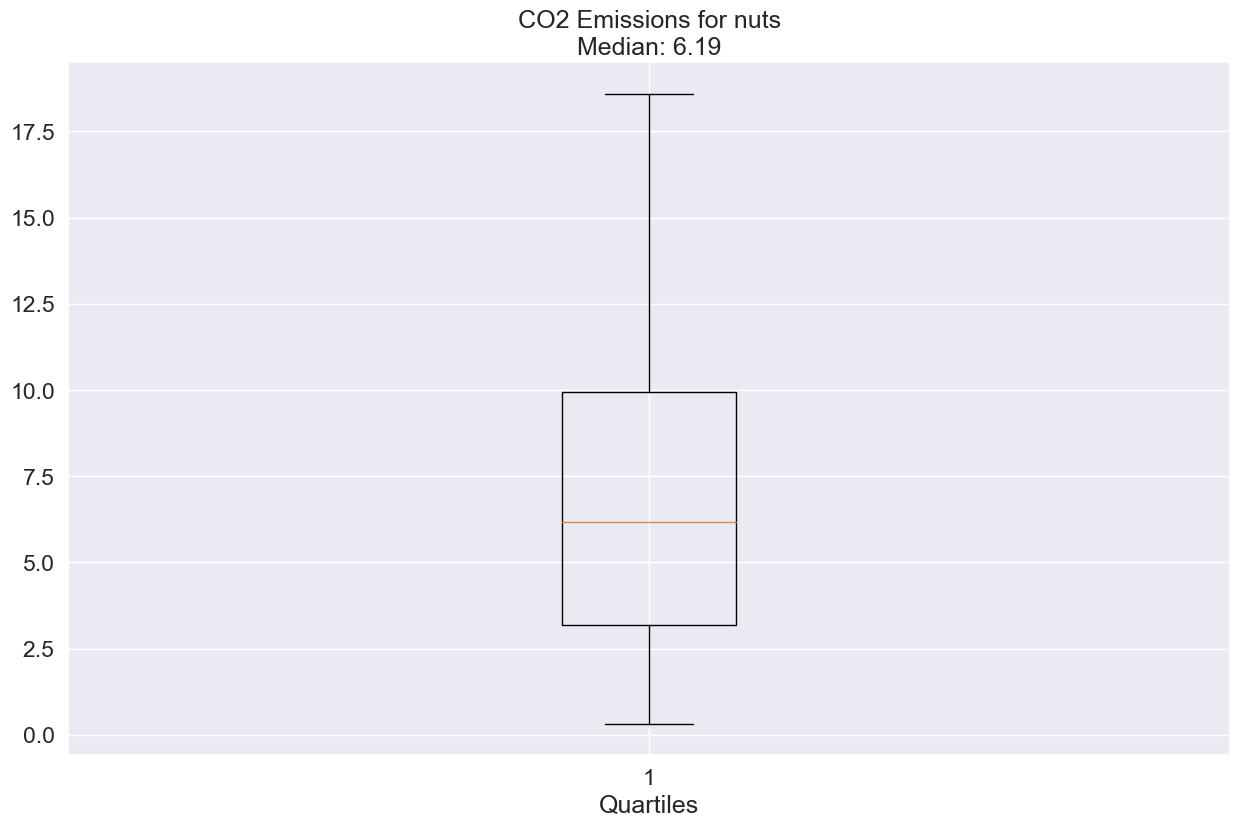

In [37]:
for category in food['food_category'].unique():
    # Get CO2 emission data for current category
    data = food.loc[food['food_category'] == category, 'co2_emission']
    # Calculate quartiles
    q1, median, q3 = data.quantile([0.25, 0.5, 0.75])
    # Create box plot with median label
    plt.boxplot(data, showfliers=False)
    plt.title(f'CO2 Emissions for {category}\nMedian: {median:.2f}')
    plt.xlabel('Quartiles')
    plt.show()


**the food category with the highest median is Beef**

4.  Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why.

In [38]:
food.groupby('food_category')['consumption'].mean()

food_category
beef          12.123385
dairy        125.774692
eggs           8.163769
fish          17.287077
lamb_goat      2.600154
nuts           4.137231
pork          16.123692
poultry       21.219231
rice          29.375154
soybeans       0.860538
wheat         71.549538
Name: consumption, dtype: float64

In [39]:
food.head()

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


- $H_0: \mu_{consumption poultry} = \mu_{consumption fish}$
- $H_1: \mu_{consumption poultry} <> \mu_{consumptionfish}$

**the test will be carried out considering a significance level of 5%**

In [40]:
df_poultry_fish = food[food['food_category'].isin(['poultry', 'fish'])]
df_poultry_fish.head()


,country,food_category,consumption,co2_emission
1,Argentina,poultry,38.66,41.53
4,Argentina,fish,4.36,6.96
12,Australia,poultry,46.12,49.54
15,Australia,fish,17.69,28.25
23,Albania,poultry,13.23,14.21


In [41]:
df_poultry_fish.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 1 to 1423
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        260 non-null    object 
 1   food_category  260 non-null    object 
 2   consumption    260 non-null    float64
 3   co2_emission   260 non-null    float64
dtypes: float64(2), object(2)
memory usage: 10.2+ KB


In [42]:
obs_mean_diff = np.mean(df_poultry_fish[df_poultry_fish['food_category'] == 'poultry']['consumption']) - np.mean(df_poultry_fish[df_poultry_fish['food_category'] == 'fish']['consumption'])
obs_mean_diff

3.932153846153831

In [43]:
n = 20000
mu_diff_samples = []
for i in range(n): 
    # extract a subsample of 50% of data without replacement
    df_sample1 = df_poultry_fish.sample(frac=0.5, replace=False)
    # use set() to get indexes of rows that were not extracted from df in previous step
    ix2 = set(df_poultry_fish.index) - set(df_sample1.index)
    # create dataframe with other 50% of data
    df_sample2 = df_poultry_fish.loc[list(ix2)]
    # calculate difference in mean from each sample
    mu_diff_temp = np.mean(df_sample1['consumption']) - np.mean(df_sample2['consumption'])
    # append sampled mean difference to mu_diff_samples list
    mu_diff_samples.append(mu_diff_temp)
mu_diff_samples


[2.94230769230769,
 2.153538461538453,
 0.557692307692303,
 2.2618461538461503,
 1.2019999999999875,
 -0.7109230769230841,
 1.2769230769230795,
 0.5773846153845987,
 -0.1930769230769478,
 -1.1898461538461547,
 -2.477230769230779,
 0.30953846153845177,
 0.7524615384615174,
 2.5315384615384424,
 -1.196000000000005,
 -0.19000000000001904,
 3.42338461538462,
 0.964307692307667,
 -1.5343076923076957,
 -0.645692307692304,
 -0.13215384615384806,
 -1.5295384615384613,
 -1.0138461538461776,
 1.3510769230769206,
 0.032769230769222446,
 1.567846153846137,
 -0.5456923076923061,
 1.983076923076915,
 -2.9460000000000086,
 -0.3081538461538642,
 -1.9826153846153858,
 0.8506153846153666,
 0.3419999999999952,
 -5.629538461538459,
 -1.4404615384615305,
 0.6409230769230803,
 1.4038461538461462,
 -1.0990769230769253,
 -0.5044615384615376,
 0.7607692307692275,
 0.13784615384614085,
 1.4244615384615251,
 -0.7647692307692324,
 -0.8573846153846212,
 1.4698461538461345,
 1.1795384615384599,
 0.9341538461538406,

In [44]:
# calculate the p-value
count = 0
for x in mu_diff_samples:
    if x > obs_mean_diff:
        count += 1
p_value = count / n
p_value

0.02865

**the p value is below the significance level of 0.05.
We can therefore reject the null hypothesis and accept the alternative hypothesis.
This means that the difference in means is statistically significant and we can conclude that the average consumption of "poultry" is higher than that of "fish".**

### Part 2

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Load and save the dataset to a DataFrame object named `happy`. As always, familiarise yourself with its contents. 

In [45]:
happy=pd.read_excel(r"D:\Users\guidi\anaconda3\esercizi\Week 21 _ End of Module Assignment\Week 21 _ End of Module Assignment\data\world_happiness.xlsx")

In [46]:
happy.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400.0,81.8,155.0
1,Denmark,4.0,6.0,3.0,22.0,48300.0,81.0,154.0
2,Norway,3.0,3.0,8.0,11.0,66300.0,82.6,153.0
3,Iceland,1.0,7.0,45.0,3.0,47900.0,83.0,152.0
4,Netherlands,15.0,19.0,12.0,7.0,50500.0,81.8,151.0


In [47]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64
 3   corruption       135 non-null    float64
 4   generosity       142 non-null    float64
 5   gdp_per_cap      143 non-null    float64
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.1+ KB


5. Using a histogram, plot the distribution of the `happiness_score` variable, **which distribution does it resemble?** *(in the answer sheet write the [name of the distribution](https://miro.medium.com/max/962/1*DmPUIjvecL7KllOamoFSDw.png) that best fits the data)* 

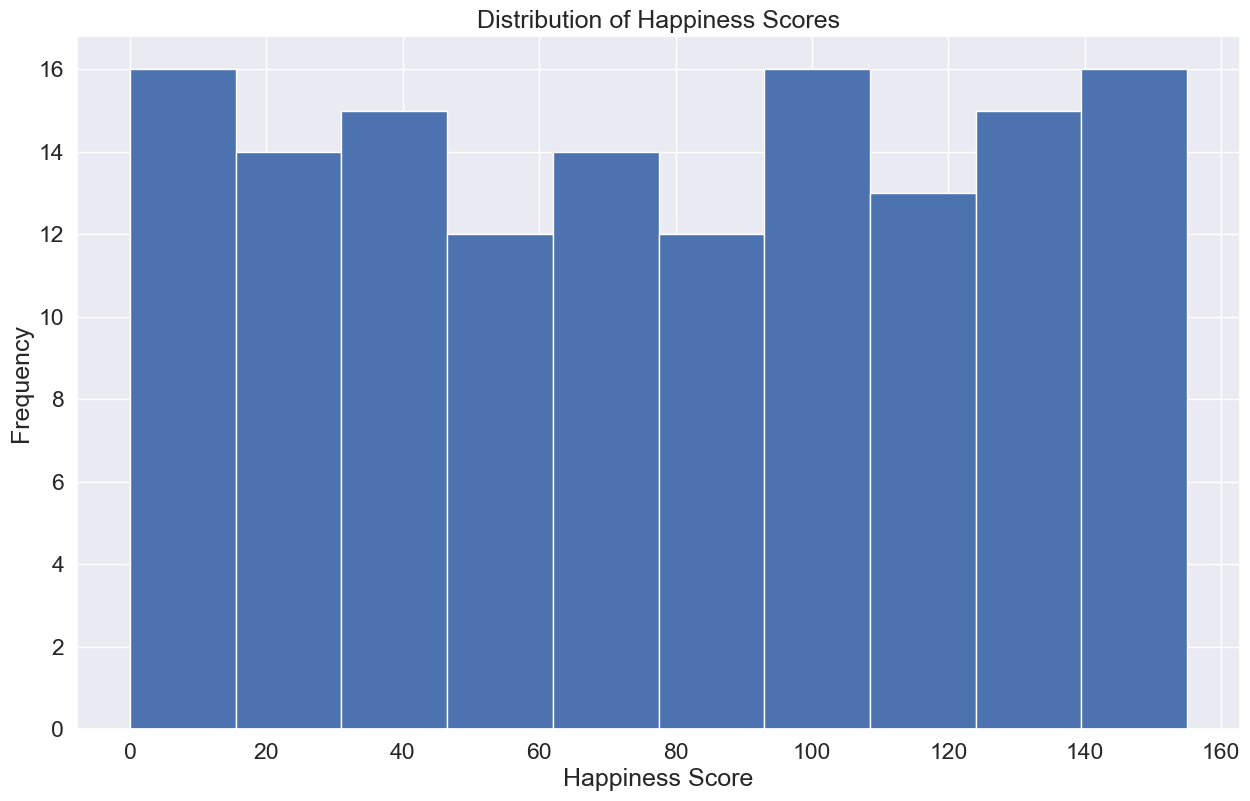

In [48]:
plt.hist(happy['happiness_score'], bins=10)

plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.title("Distribution of Happiness Scores")


plt.show()

**the best fitting function is a Uniform distribution**

6. Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?** 

In [49]:
matrix=happy[['social_support','freedom','corruption','generosity','gdp_per_cap','life_exp','happiness_score']].corr()

<AxesSubplot:>

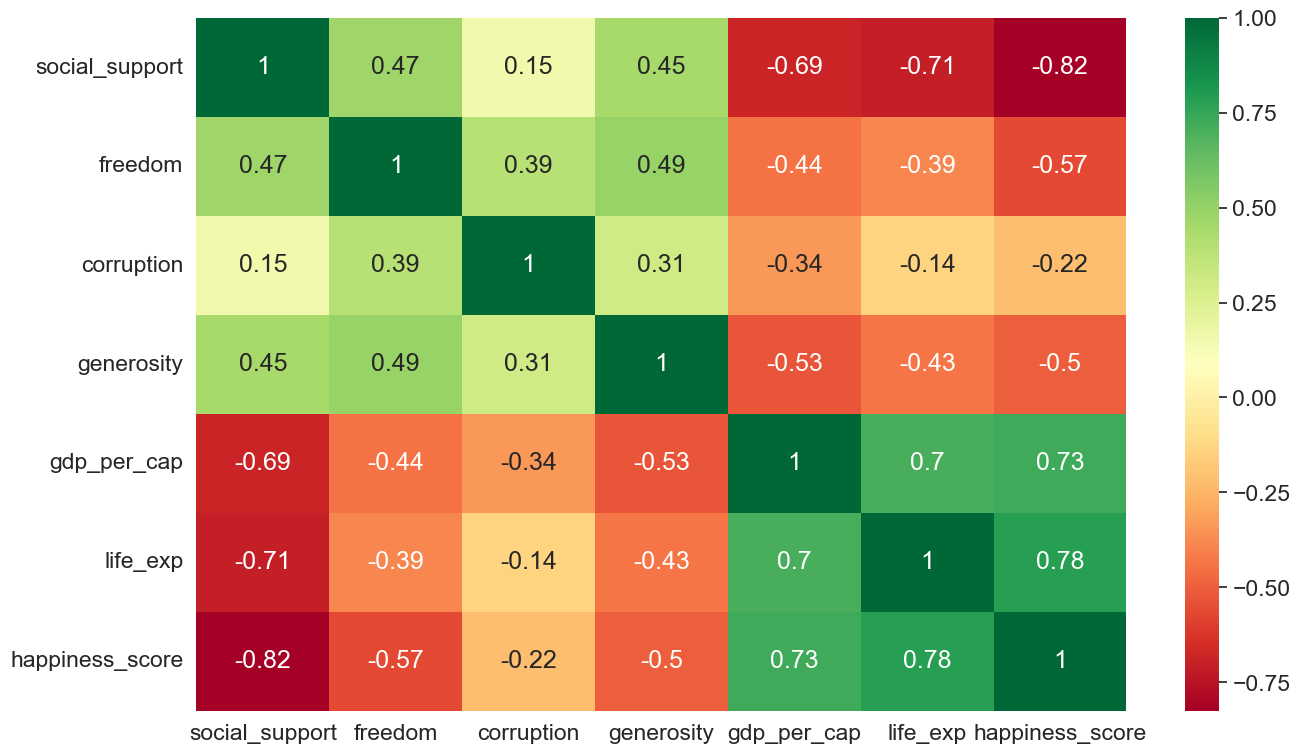

In [50]:
sns.heatmap(matrix, annot=True, cmap="RdYlGn")

In [71]:
print(f'The variable with the lowest correlation with happiness_score is corruption')

The variable with the lowest correlation with happiness_score is corruption


7. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*. 

In [52]:
happy[happy['corruption'].isna()]

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
20,United Arab Emirates,72.0,4.0,NaN,15.0,65700.0,73.6,135.0
26,Saudi Arabia,62.0,68.0,NaN,82.0,48100.0,77.1,128.0
27,Qatar,NaN,NaN,NaN,NaN,113000.0,80.5,127.0
35,Bahrain,59.0,24.0,NaN,23.0,42000.0,79.8,119.0
47,Kuwait,69.0,47.0,NaN,42.0,64100.0,83.3,105.0
78,Turkmenistan,8.0,83.0,NaN,33.0,17600.0,70.3,69.0
84,China,108.0,31.0,NaN,133.0,17100.0,77.5,63.0
91,Jordan,88.0,88.0,NaN,118.0,8350.0,79.6,55.0


In [53]:
print(f'The number of value NaN in corruption is {happy["corruption"].isna().sum()}')


The number of value NaN in corruption is 8


In [54]:
happy['corruption'].fillna(happy['corruption'].mean(), inplace=True)


In [55]:
happy[happy['corruption'].isna()]

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score


8. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**. 

In [56]:
cols = ['corruption', 'social_support', 'generosity', 'gdp_per_cap', 'happiness_score', 'freedom']
for col in cols:
    if happy[col].isna().any():
        print(f"Rows with missing values in column '{col}':")
        print(happy[happy[col].isna()])
        happy[col].fillna(happy[col].mean(), inplace=True)


Rows with missing values in column 'social_support':
   country  social_support  freedom  corruption  generosity  gdp_per_cap  \
27   Qatar             NaN      NaN   73.244444         NaN     113000.0   

    life_exp  happiness_score  
27      80.5            127.0  
Rows with missing values in column 'generosity':
   country  social_support  freedom  corruption  generosity  gdp_per_cap  \
27   Qatar       77.352113      NaN   73.244444         NaN     113000.0   

    life_exp  happiness_score  
27      80.5            127.0  
Rows with missing values in column 'freedom':
   country  social_support  freedom  corruption  generosity  gdp_per_cap  \
27   Qatar       77.352113      NaN   73.244444    78.78169     113000.0   

    life_exp  happiness_score  
27      80.5            127.0  


In [57]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   143 non-null    float64
 2   freedom          143 non-null    float64
 3   corruption       143 non-null    float64
 4   generosity       143 non-null    float64
 5   gdp_per_cap      143 non-null    float64
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.1+ KB


In [58]:
happy.columns

Index(['country', 'social_support', 'freedom', 'corruption', 'generosity',
       'gdp_per_cap', 'life_exp', 'happiness_score'],
      dtype='object')

In [59]:
Y=happy['happiness_score']
X=happy['life_exp']
X=sm.add_constant(data=X)
model=sm.OLS(endog=Y,exog=X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     219.4
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           1.59e-30
Time:                        11:12:11   Log-Likelihood:                -683.97
No. Observations:                 143   AIC:                             1372.
Df Residuals:                     141   BIC:                             1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -298.8710     25.536    -11.704      0.000    -349.355    -248.387
life_exp       5.1021      0.344     14.812      0.000       4.421       5.783
==============================================================================
Omnibus:                        7.539   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.120
Skew:                          -0.408   Prob(JB):                       0.0469
Kurtosis:                       2.400   Cond. No.                         778.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
print(result.params)


const      -298.871019
life_exp      5.102063
dtype: float64


**Based on params, a 1-year increase in life expectancy corresponds to an increase of 5.102063 points in the happiness score.**

9. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, train a linear regression model where you try to predict the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(use a `random_state=42`)*. Calculate the R-squared on the train set and compare it with the R-squared based on the test set. **Would you say that the model is overfitting the training data?** Motivate your answer. 

In [61]:
y = happy['happiness_score']
X = happy[['social_support', 'freedom', 'generosity', 'life_exp']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train, y_train)


In [62]:
r2_train = reg.score(X_train, y_train)
r2_test = reg.score(X_test, y_test)
print(f'R-squared train is {r2_train} R-squared test is {r2_test}')

R-squared train is 0.7848873839014491 R-squared test is 0.7772372395041663


In [63]:
if r2_train > r2_test:
    print("The model is overfitting the training data")
else:
    print("The model is not overfitting the training data")

The model is overfitting the training data


**R-squared is a measure of the goodness of fit of the model. It represents the percentage of variance in the data that is explained by the model. The higher the R-squared, the more accurate the model is and the better it is able to explain the variance in the data. R-squared on the training set is higher than the R-squared on the test set, it suggests that the model is overfitting the training data, Model overfitting occurs when a model describes the training data too well but is unable to generalize correctly to new and unknown data**

10. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answers Sheet.** Are you satisfyied with the model's performance?

In [64]:
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

In [65]:
y_pred = reg.predict(X_test)

print( mae(y_test, y_pred))


17.54


**The MAE also confirms the overfitting of the model, as the error in absolute value between the estimate of y and our test dataset is high**

### Bonus

11. <span style="color:red">[BONUS]</span> **Do you notice anything strange when looking at the regression coefficients of the model in the previous answer?** (answer here, not on the response Google Sheet)

In [66]:
reg.coef_

array([-0.51189004, -0.1785519 , -0.05177255,  1.81093177])

**I noticed based on the coefficients that:**

**A 1-unit increase in the social_support variable is associated with a 0.51189004-unit decrease in the happiness_score variable.**

**B 1-unit increase in the variable freedom is associated with a decrease of 0.1785519 units in the variable happiness_score.**

**C 1-unit increase in the generosity variable is associated with a 0.05177255-unit decrease in the happiness_score variable.**

**D 1-unit increase in the life_exp variable is associated with a 1.81093177-unit increase in the happiness_score variable.**

**In practice, as the chosen variable increases, with the exception of life_exp, the happiness_score decreases. This is weird because I would**
**expected that an increase in the chosen variables would lead to an increase in the happiness_score. Conversely, according to the model, an increase in these**
**variables carries a decrease of the happyness_score**


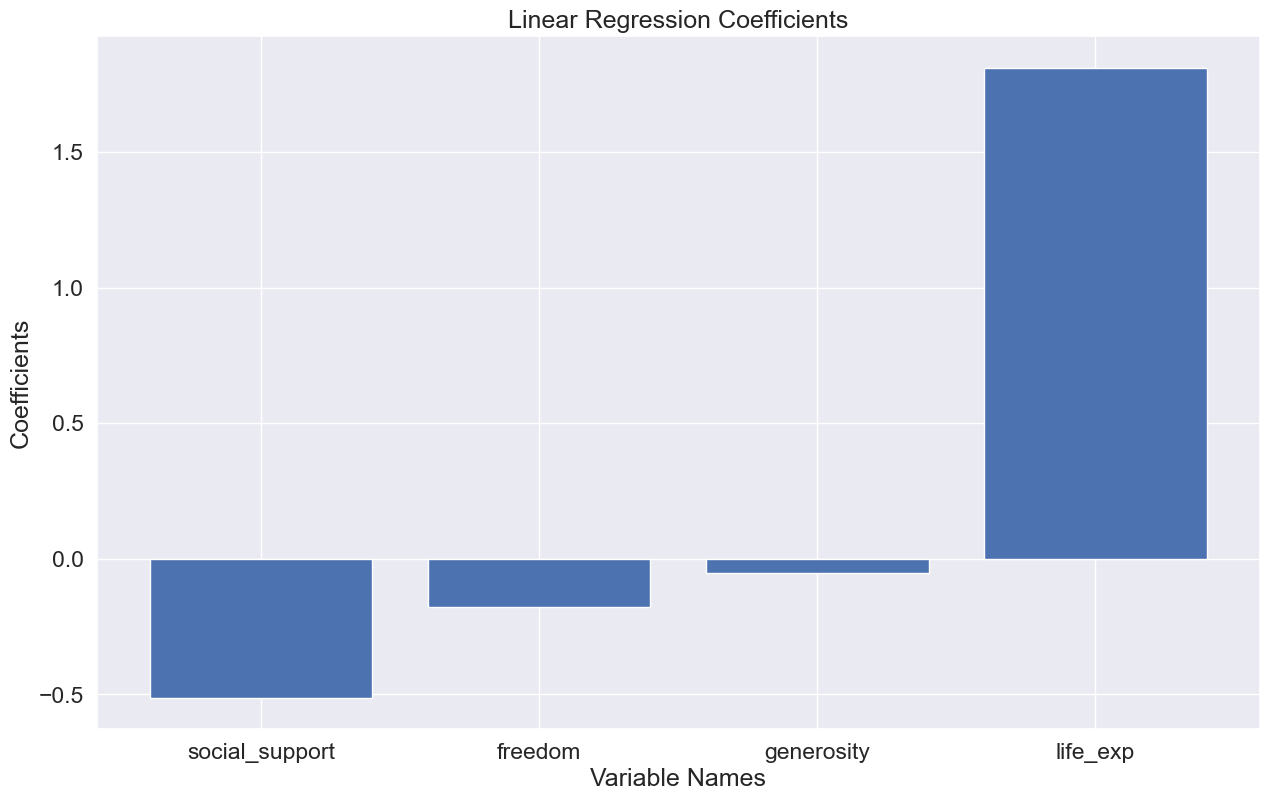

In [67]:
coefficients = [-0.51189004, -0.1785519 , -0.05177255,  1.81093177]
variable_names = ['social_support', 'freedom', 'generosity', 'life_exp']

plt.bar(variable_names, coefficients)
plt.xlabel("Variable Names")
plt.ylabel("Coefficients")
plt.title("Linear Regression Coefficients")
plt.show()

12. <span style="color:red">[BONUS]</span> The code in the following cell creates a forecasting model using the `prophet` library. Specifically, it fits an additive model (the effect of the seasonality is added to the trend in order to get forecasts) on a dataframe `df` which contains the number of airline passengers over time. Notice how the seasonality in the forecast is too large at the start of the time series and too small at the end (compared to the data it tries to fit). **Modify the Prophet code to account for the effect of growing seasonality.** 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


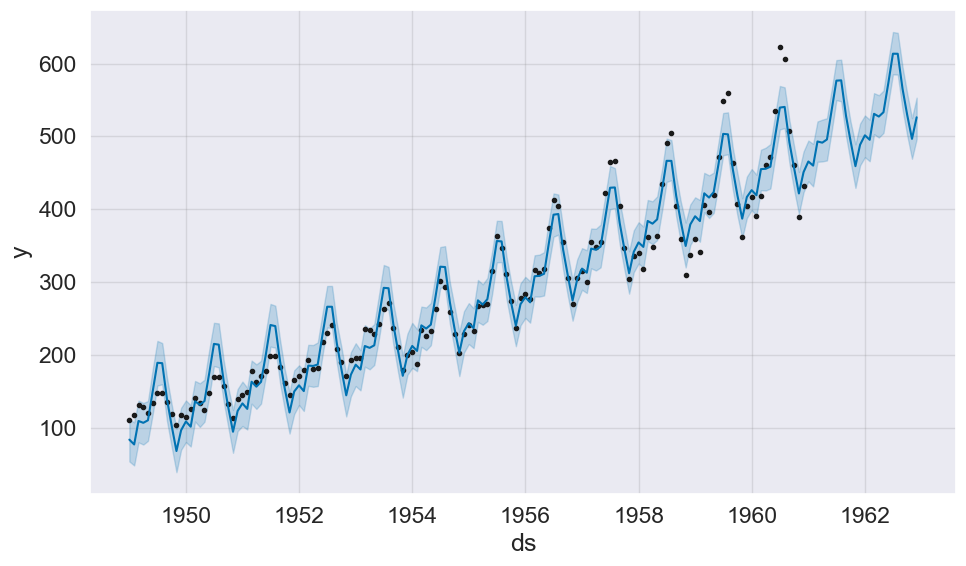

In [68]:
# DO NOT DELETE >>> RUN THIS CELL!

from prophet import Prophet

df = pd.read_excel(r"D:\Users\guidi\anaconda3\esercizi\Week 21 _ End of Module Assignment\Week 21 _ End of Module Assignment\data\air-passengers.xlsx")
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


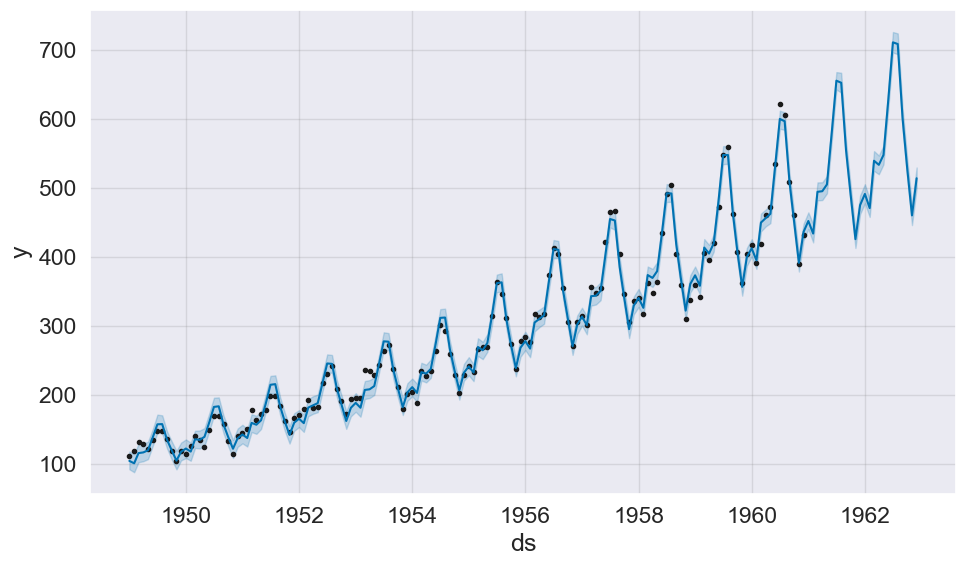

In [69]:

m = Prophet(seasonality_mode='multiplicative', seasonality_prior_scale=0.1)
m.fit(df)

future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)

fig = m.plot(forecast)
